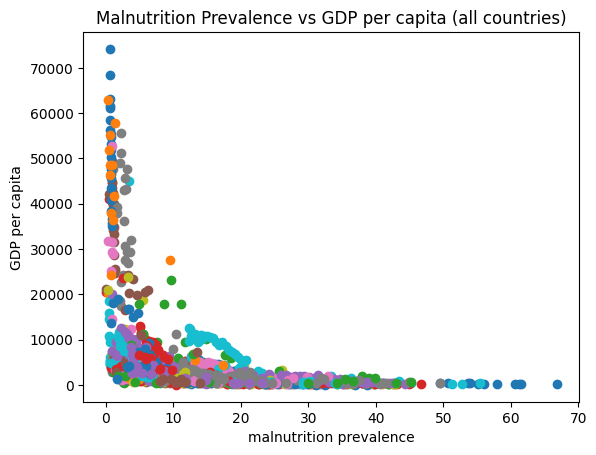

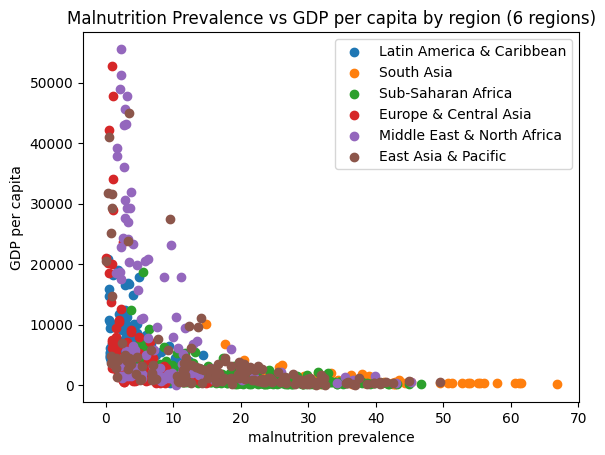

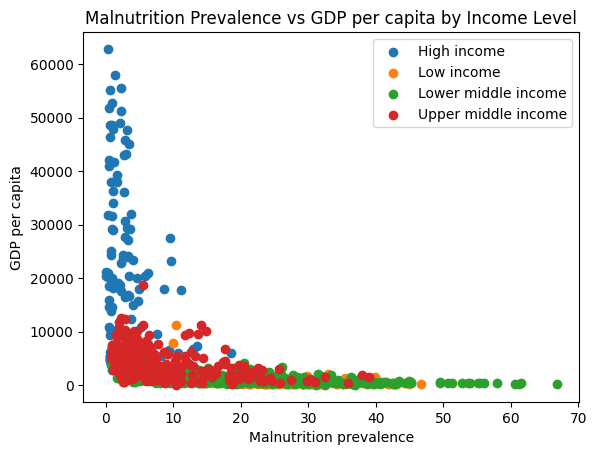

In [1]:
# Q1

import matplotlib.pyplot as plt
import micropip
import numpy as np
import pandas as pd

def problem_one():
    # read excel file at specific sheet
    gdp_worksheet = pd.read_excel("GDP_per_capita.xls", sheet_name = "Data", usecols = 'A:B, E:BO')
    malnutrition_worksheet = pd.read_excel('malnutrition_prevalence_weight_for_age.xls', sheet_name = "Data", usecols = 'A:B, E:BO')
    
    # contains only the data related to gdp per capita 
    gdp_per_capita_data = pd.concat([gdp_worksheet.iloc[2:269, 0:2], gdp_worksheet.iloc[2:269, 4:]], axis = 1)
    columns = gdp_per_capita_data.iloc[0, :]
    gdp_per_capita_data.columns = columns
    gdp_per_capita_data = gdp_per_capita_data.iloc[1:, :]
    
    # contains only data related to malnutrition data
    malnutrition_data = pd.concat([malnutrition_worksheet.iloc[2:269, 0:2], malnutrition_worksheet.iloc[2:269, 4:]], axis = 1)
    columns = malnutrition_data.iloc[0, :]
    malnutrition_data.columns = columns
    malnutrition_data = malnutrition_data.iloc[1:, :]
    
    # check that GDP and malnutrition matrix is synchronized
    assert(gdp_per_capita_data['Country Name'].equals(malnutrition_data['Country Name']))
    
    fig, ax = plt.subplots()
    plt.xlabel("malnutrition prevalence")
    plt.ylabel("GDP per capita")
    plt.title("Malnutrition Prevalence vs GDP per capita (all countries)")
    
    # plot every countries malnutrition vs gdp per capita
    rows = gdp_per_capita_data.shape[0]
    for i in range(rows):
        x_i = malnutrition_data.iloc[i, 2:]
        y_i = gdp_per_capita_data.iloc[i, 2:]
        plt.scatter(x_i, y_i)
    
    plt.show()
    
    fig, ax = plt.subplots()
    plt.xlabel("malnutrition prevalence")
    plt.ylabel("GDP per capita")
    plt.title("Malnutrition Prevalence vs GDP per capita by region (6 regions)")
    
    # read excel file with specific sheet
    metadata_countries = pd.read_excel('GDP_per_capita.xls', sheet_name = "Metadata - Countries")

    # remove country code with no region
    country_code_region = pd.concat([metadata_countries['Country Code'], metadata_countries['Region']], axis = 1).dropna()
    regions = list(country_code_region['Region'].unique())
    regions.remove('North America')
    
    # make a dictionary mapping region to country codes
    country_code_region_d = dict()
    for region in regions:
        country_code_region_d[region] = np.array(country_code_region.loc[country_code_region['Region'] == region].iloc[:, 0])
    
    # make pandas dataframe mapping country code to gdp per capita
    country_code_to_gdp_per_capita = pd.concat([gdp_per_capita_data['Country Code'], gdp_per_capita_data.iloc[:, 2:]], axis = 1)
    
    # make pandas dataframe mapping country code to malnutrition
    country_code_to_malnutrition = pd.concat([malnutrition_data['Country Code'], malnutrition_data.iloc[:, 2:]], axis = 1)

    # loop through the regions, retrieve countries within that region as well as their
    # malnutrition rate and GDP and plot those values
    for region in regions:
        # access countries in region
        countries = country_code_region_d[region]
        
        malnutrition_region = np.array([])
        gdp_region = np.array([])
        
        # access malnutrition and gdp data of each region
        for country in countries:
            gdp_of_country = np.array(country_code_to_gdp_per_capita.loc[country_code_to_gdp_per_capita['Country Code'] == country].iloc[0, 1:])
            malnutrition_of_country = np.array(country_code_to_malnutrition.loc[country_code_to_malnutrition['Country Code'] == country].iloc[0, 1:])
            
            malnutrition_region = np.append(malnutrition_region, malnutrition_of_country)
            gdp_region = np.append(gdp_region, gdp_of_country)
        
        plt.scatter(malnutrition_region, gdp_region, label = region)
    
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    plt.xlabel("Malnutrition prevalence")
    plt.ylabel("GDP per capita")
    plt.title("Malnutrition Prevalence vs GDP per capita by Income Level")
    
    # remove country code with no income level
    country_code_income = pd.concat([metadata_countries['Country Code'], metadata_countries['IncomeGroup']], axis = 1).dropna()
    
    income_levels = list(country_code_income['IncomeGroup'].unique())
    
    # make a dictionary mapping income level to country code
    country_code_income_d = dict()
    for income_level in income_levels:
        country_code_income_d[income_level] = np.array(country_code_income.loc[country_code_income['IncomeGroup'] == income_level].iloc[:, 0])
    
    # loop through the income levels, retrieve countries within that income level as well as their
    # malnutrition rate and GDP and plot those values
    for income_level in income_levels:
        # access countries in income level
        countries = country_code_income_d[income_level]
        
        malnutrition_region = np.array([])
        gdp_region = np.array([])
        
        # access malnutrition and gdp data of each income level
        for country in countries:
            gdp_of_country = np.array(country_code_to_gdp_per_capita.loc[country_code_to_gdp_per_capita['Country Code'] == country].iloc[0, 1:])
            malnutrition_of_country = np.array(country_code_to_malnutrition.loc[country_code_to_malnutrition['Country Code'] == country].iloc[0, 1:])
            
            malnutrition_region = np.append(malnutrition_region, malnutrition_of_country)
            gdp_region = np.append(gdp_region, gdp_of_country)
        
        plt.scatter(malnutrition_region, gdp_region, label = income_level)
    
    plt.legend()
    plt.show()
    
problem_one()


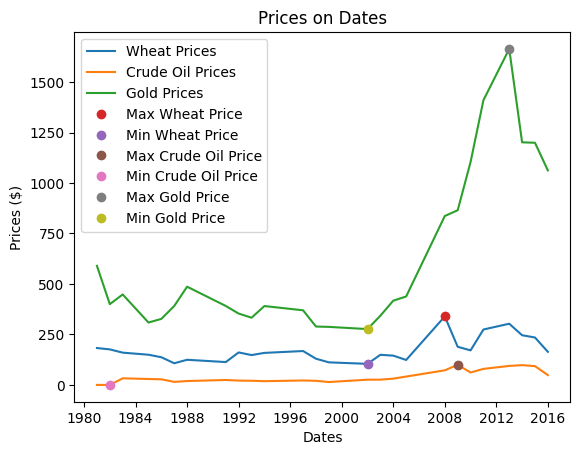

In [2]:
# Q2

import matplotlib.pyplot as plt
import nasdaqdatalink
import numpy as np
import pandas as pd

def reorder_by_date_price(nasdaq_data, name):
    dates = np.array([entry[0] for entry in nasdaq_data], dtype='datetime64[D]')
    prices = np.array([entry[1] for entry in nasdaq_data])
    d = {'Date': dates, name: prices}
    df = pd.DataFrame(data=d)
    return df

def problem_two():
    # retrieve data from NASDAQ
    api_key = '-B6YFa8wdCsGVmz-xzhL'
    wheat_prices = nasdaqdatalink.get('ODA/PWHEAMT_USD', api_key = api_key, returns="numpy")
    crude_oil_prices = nasdaqdatalink.get('WGEC/WLD_CRUDE_WTI', api_key = api_key, returns="numpy")
    gold_prices = nasdaqdatalink.get('BUNDESBANK/BBK01_WT5511', api_key = api_key, returns="numpy")

    # reformat data (since .get method returns n x 1 array)
    wheat_prices = reorder_by_date_price(wheat_prices, "Wheat Prices")
    crude_oil_prices = reorder_by_date_price(crude_oil_prices, "Crude Oil Prices")
    gold_prices = reorder_by_date_price(gold_prices, "Gold Prices")

    # merge all prices into single dataframe and match prices by date
    merged_prices = pd.merge(wheat_prices, crude_oil_prices, on='Date') 
    merged_prices = pd.merge(merged_prices, gold_prices, on='Date')
    
    # plot wheat, oil, and gold prices
    plt.plot(merged_prices['Date'], merged_prices['Wheat Prices'], label = 'Wheat Prices')
    plt.plot(merged_prices['Date'], merged_prices['Crude Oil Prices'], label = 'Crude Oil Prices')
    plt.plot(merged_prices['Date'], merged_prices['Gold Prices'], label = 'Gold Prices')

    # indicate min & max with colored dots for all datasets
    plt.plot_date(merged_prices[merged_prices['Wheat Prices'] == merged_prices['Wheat Prices'].max()]['Date'], merged_prices['Wheat Prices'].max(), label = 'Max Wheat Price')
    plt.plot_date(merged_prices[merged_prices['Wheat Prices'] == merged_prices['Wheat Prices'].min()]['Date'], merged_prices['Wheat Prices'].min(), label = 'Min Wheat Price')
    plt.plot_date(merged_prices[merged_prices['Crude Oil Prices'] == merged_prices['Crude Oil Prices'].max()]['Date'], merged_prices['Crude Oil Prices'].max(), label = 'Max Crude Oil Price')
    plt.plot_date(merged_prices[merged_prices['Crude Oil Prices'] == merged_prices['Crude Oil Prices'].min()]['Date'].iloc[-1], merged_prices['Crude Oil Prices'].min(), label = 'Min Crude Oil Price')
    plt.plot_date(merged_prices[merged_prices['Gold Prices'] == merged_prices['Gold Prices'].max()]['Date'], merged_prices['Gold Prices'].max(), label = 'Max Gold Price')
    plt.plot_date(merged_prices[merged_prices['Gold Prices'] == merged_prices['Gold Prices'].min()]['Date'], merged_prices['Gold Prices'].min(), label = 'Min Gold Price')

    plt.xlabel('Dates')
    plt.ylabel('Prices ($)')
    plt.title('Prices on Dates')
    plt.legend()
    plt.show()
    
problem_two()


In [3]:
# Q3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate

def problem_three():
    # read C02 emissions excel file and extract emissions from 2010
    c02_worksheet = pd.read_excel("C02_emissions.xls", sheet_name = "Data")
    i = np.where(np.array(np.array(c02_worksheet.iloc[2, 4:], dtype = 'int') == 2010))[0][0] + 4
    emissions_2010 = c02_worksheet.iloc[3:, i]
    mean = emissions_2010.mean()
    median = emissions_2010.median()
    std = emissions_2010.std()
    
    # creating dataframe for c02 emissions
    data = [[mean, median, std, emissions_2010.quantile(0.05), emissions_2010.quantile(0.25), emissions_2010.quantile(0.75), emissions_2010.quantile(0.95)]]
    emissions_df = pd.DataFrame(data, columns=['mean', 'median', 'standard deviation', '5 percentile', '25 percentile', '75 percentile', '95 percentile'])
    print("c02 emissions table")
    print(tabulate(emissions_df, headers='keys', tablefmt='psql'))

    # read school enrollment excel file and extract emissions from 2010
    school_enrollment = pd.read_excel("school_enrollment_primary.xls", sheet_name = "Data")
    i = np.where(np.array(np.array(school_enrollment.iloc[2, 4:], dtype = 'int') == 2010))[0][0] + 4
    enrollment_2010 = school_enrollment.iloc[3:, i]
    mean = enrollment_2010.mean()
    median = enrollment_2010.median()
    std = enrollment_2010.std()
    
    # creating dataframe for c02 emissions
    data = [[mean, median, std, enrollment_2010.quantile(0.05), enrollment_2010.quantile(0.25), enrollment_2010.quantile(0.75), enrollment_2010.quantile(0.95)]]
    school_enrollment_df = pd.DataFrame(data, columns=['mean', 'median', 'standard deviation', '5 percentile', '25 percentile', '75 percentile', '95 percentile'])
    print("school enrollment table")
    print(tabulate(school_enrollment_df, headers='keys', tablefmt='psql'))

problem_three()


c02 emissions table
+----+---------+----------+----------------------+----------------+-----------------+-----------------+-----------------+
|    |    mean |   median |   standard deviation |   5 percentile |   25 percentile |   75 percentile |   95 percentile |
|----+---------+----------+----------------------+----------------+-----------------+-----------------+-----------------|
|  0 | 4.30466 |  2.66714 |              5.06919 |        0.11486 |        0.756011 |          5.8918 |          15.172 |
+----+---------+----------+----------------------+----------------+-----------------+-----------------+-----------------+
school enrollment table
+----+---------+----------+----------------------+----------------+-----------------+-----------------+-----------------+
|    |    mean |   median |   standard deviation |   5 percentile |   25 percentile |   75 percentile |   95 percentile |
|----+---------+----------+----------------------+----------------+-----------------+-----------------

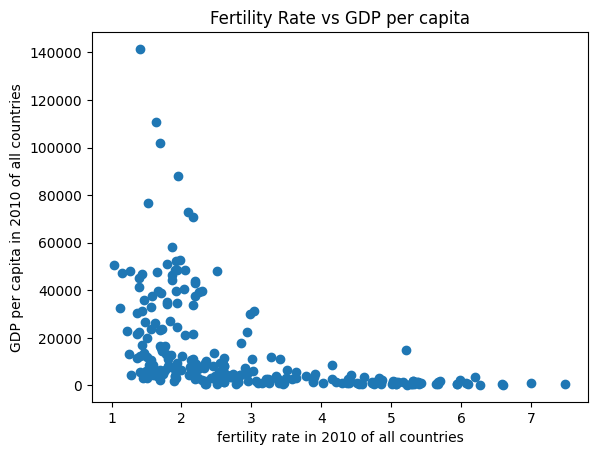

mean 1990: 0.4981203007518797
median 1990: 0.4981203007518797
mean 2010: 0.4981203007518797
media 2010: 0.4981203007518797


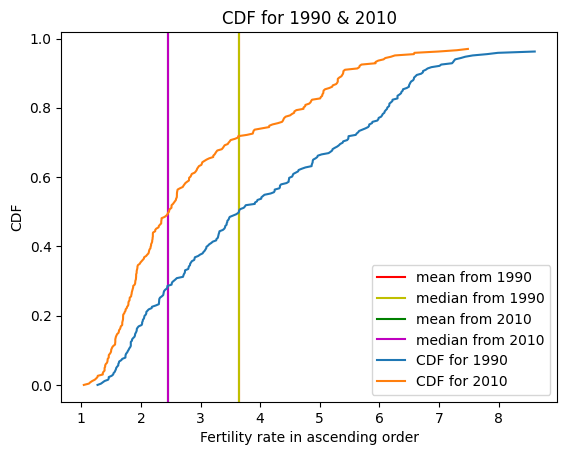

In [4]:
# Q4

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def problem_four():
    fig, ax = plt.subplots()
    gdp_worksheet = pd.read_excel("GDP_per_capita.xls", sheet_name = "Data")
    total_fertility_rate_worksheet = pd.read_excel("fertility_rate.xls", sheet_name = "Data")

    # find column where 2010 values are stored
    col_num_gdp_2010 = np.where(np.array(np.array(gdp_worksheet.iloc[2, 4:], dtype = 'int') == 2010))[0][0] + 4
    col_num_fertility_2010 = np.where(np.array(np.array(total_fertility_rate_worksheet.iloc[2, 4:], dtype = 'int') == 2010))[0][0] + 4

    # retrieve only column that contains 2010 data
    gdp_2010 = gdp_worksheet.iloc[3:, col_num_gdp_2010]
    fertility_2010 = total_fertility_rate_worksheet.iloc[3:, col_num_fertility_2010]

    plt.scatter(fertility_2010, gdp_2010)
    plt.xlabel("fertility rate in 2010 of all countries")
    plt.ylabel("GDP per capita in 2010 of all countries")
    plt.title("Fertility Rate vs GDP per capita")
    
    plt.show()
    
    fig, ax = plt.subplots()
    
    # calculating CDFs for 1990 and 2010
    col_num_fertility_1990 = np.where(np.array(np.array(total_fertility_rate_worksheet.iloc[2, 4:], dtype = 'int') == 1990))[0][0] + 4
    fertility_1990 = np.array(total_fertility_rate_worksheet.iloc[3:, col_num_fertility_1990])
    
    # sort data
    x_1990 = np.sort(fertility_1990)
    x_2010 = np.sort(np.array(fertility_2010))
    
    # calculate CDF
    y_1990 = np.arange(len(fertility_1990)) / float(len(fertility_1990))
    y_2010 = np.arange(len(fertility_2010)) / float(len(fertility_2010))
    
    # calculate means and medians of CDFs of both years
    mean_1990 = np.mean(y_1990)
    median_1990 = np.median(y_1990)
    mean_2010 = np.mean(y_2010)
    median_2010 = np.median(y_2010)
    
    print("mean 1990:", mean_1990)
    print("median 1990:", median_1990)
    print("mean 2010:", mean_2010)
    print("media 2010:", median_2010)
    
    # plotting vertical line with means and medians 
    plt.axvline(x = np.interp(mean_1990, y_1990, x_1990), color = 'r', label = 'mean from 1990')
    plt.axvline(x = np.interp(median_1990, y_1990, x_1990), color = 'y', label = 'median from 1990')
    plt.axvline(x = np.interp(mean_2010, y_2010, x_2010), color = 'g', label = 'mean from 2010')
    plt.axvline(x = np.interp(median_2010, y_2010, x_2010), color = 'm', label = 'median from 2010')
    
    plt.plot(x_1990, y_1990, label = "CDF for 1990")
    plt.plot(x_2010, y_2010, label = "CDF for 2010")
    plt.xlabel("Fertility rate in ascending order")
    plt.ylabel("CDF")
    plt.title("CDF for 1990 & 2010")
    plt.legend()
    plt.show()

problem_four()


c:\Users\yasse\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


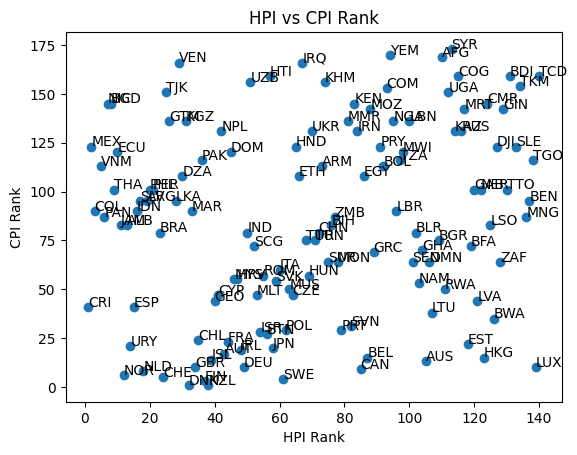

In [5]:
# Q5

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def problem_five():
    hpi_worksheet = pd.read_excel("hpi-data-2016.xlsx", sheet_name = "Complete HPI data", usecols = 'B, C').iloc[5:144]
    hpi_worksheet.columns = ['HPI Rank', 'Country']
    cpi_worksheet = pd.read_excel("CPI2016_Results.xlsx", sheet_name = "CPI 2015-2016", usecols = 'A, B, F').iloc[:176]
    
    # merge HPI and CPI data by country
    merged_hpi_cpi = pd.merge(hpi_worksheet, cpi_worksheet, on = 'Country').dropna()
    
    plt.scatter(merged_hpi_cpi['HPI Rank'], merged_hpi_cpi['CPI 2016 Rank'])
    
    # annotate all of the points according to country's code
    for i in range(merged_hpi_cpi.shape[0]):
        plt.annotate(merged_hpi_cpi['WB Code'][i], (merged_hpi_cpi['HPI Rank'][i], merged_hpi_cpi['CPI 2016 Rank'][i] + 0.2))
    
    plt.xlabel('HPI Rank')
    plt.ylabel('CPI Rank')
    plt.title('HPI vs CPI Rank')
    plt.show()
    
problem_five()
